In [2]:
# Import the standard tools for working with Pandas dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shelve
import pandasql

In [3]:
# Read in the file containing all the patient data
patientdata = pd.read_csv("G:/MIMIC-ALL/MIMIC-PATIENTS/patient_data.csv")

In [4]:
# Grab the fields and their respective units
labelfile = pd.read_csv("G:/MIMIC-ALL/MIMIC-PATIENTS/Dataset_Description_CSV.csv", header=1)

In [5]:
# Build a dictionary of nothing but fields and units
labels = labelfile.set_index('Field').to_dict()['Unit']

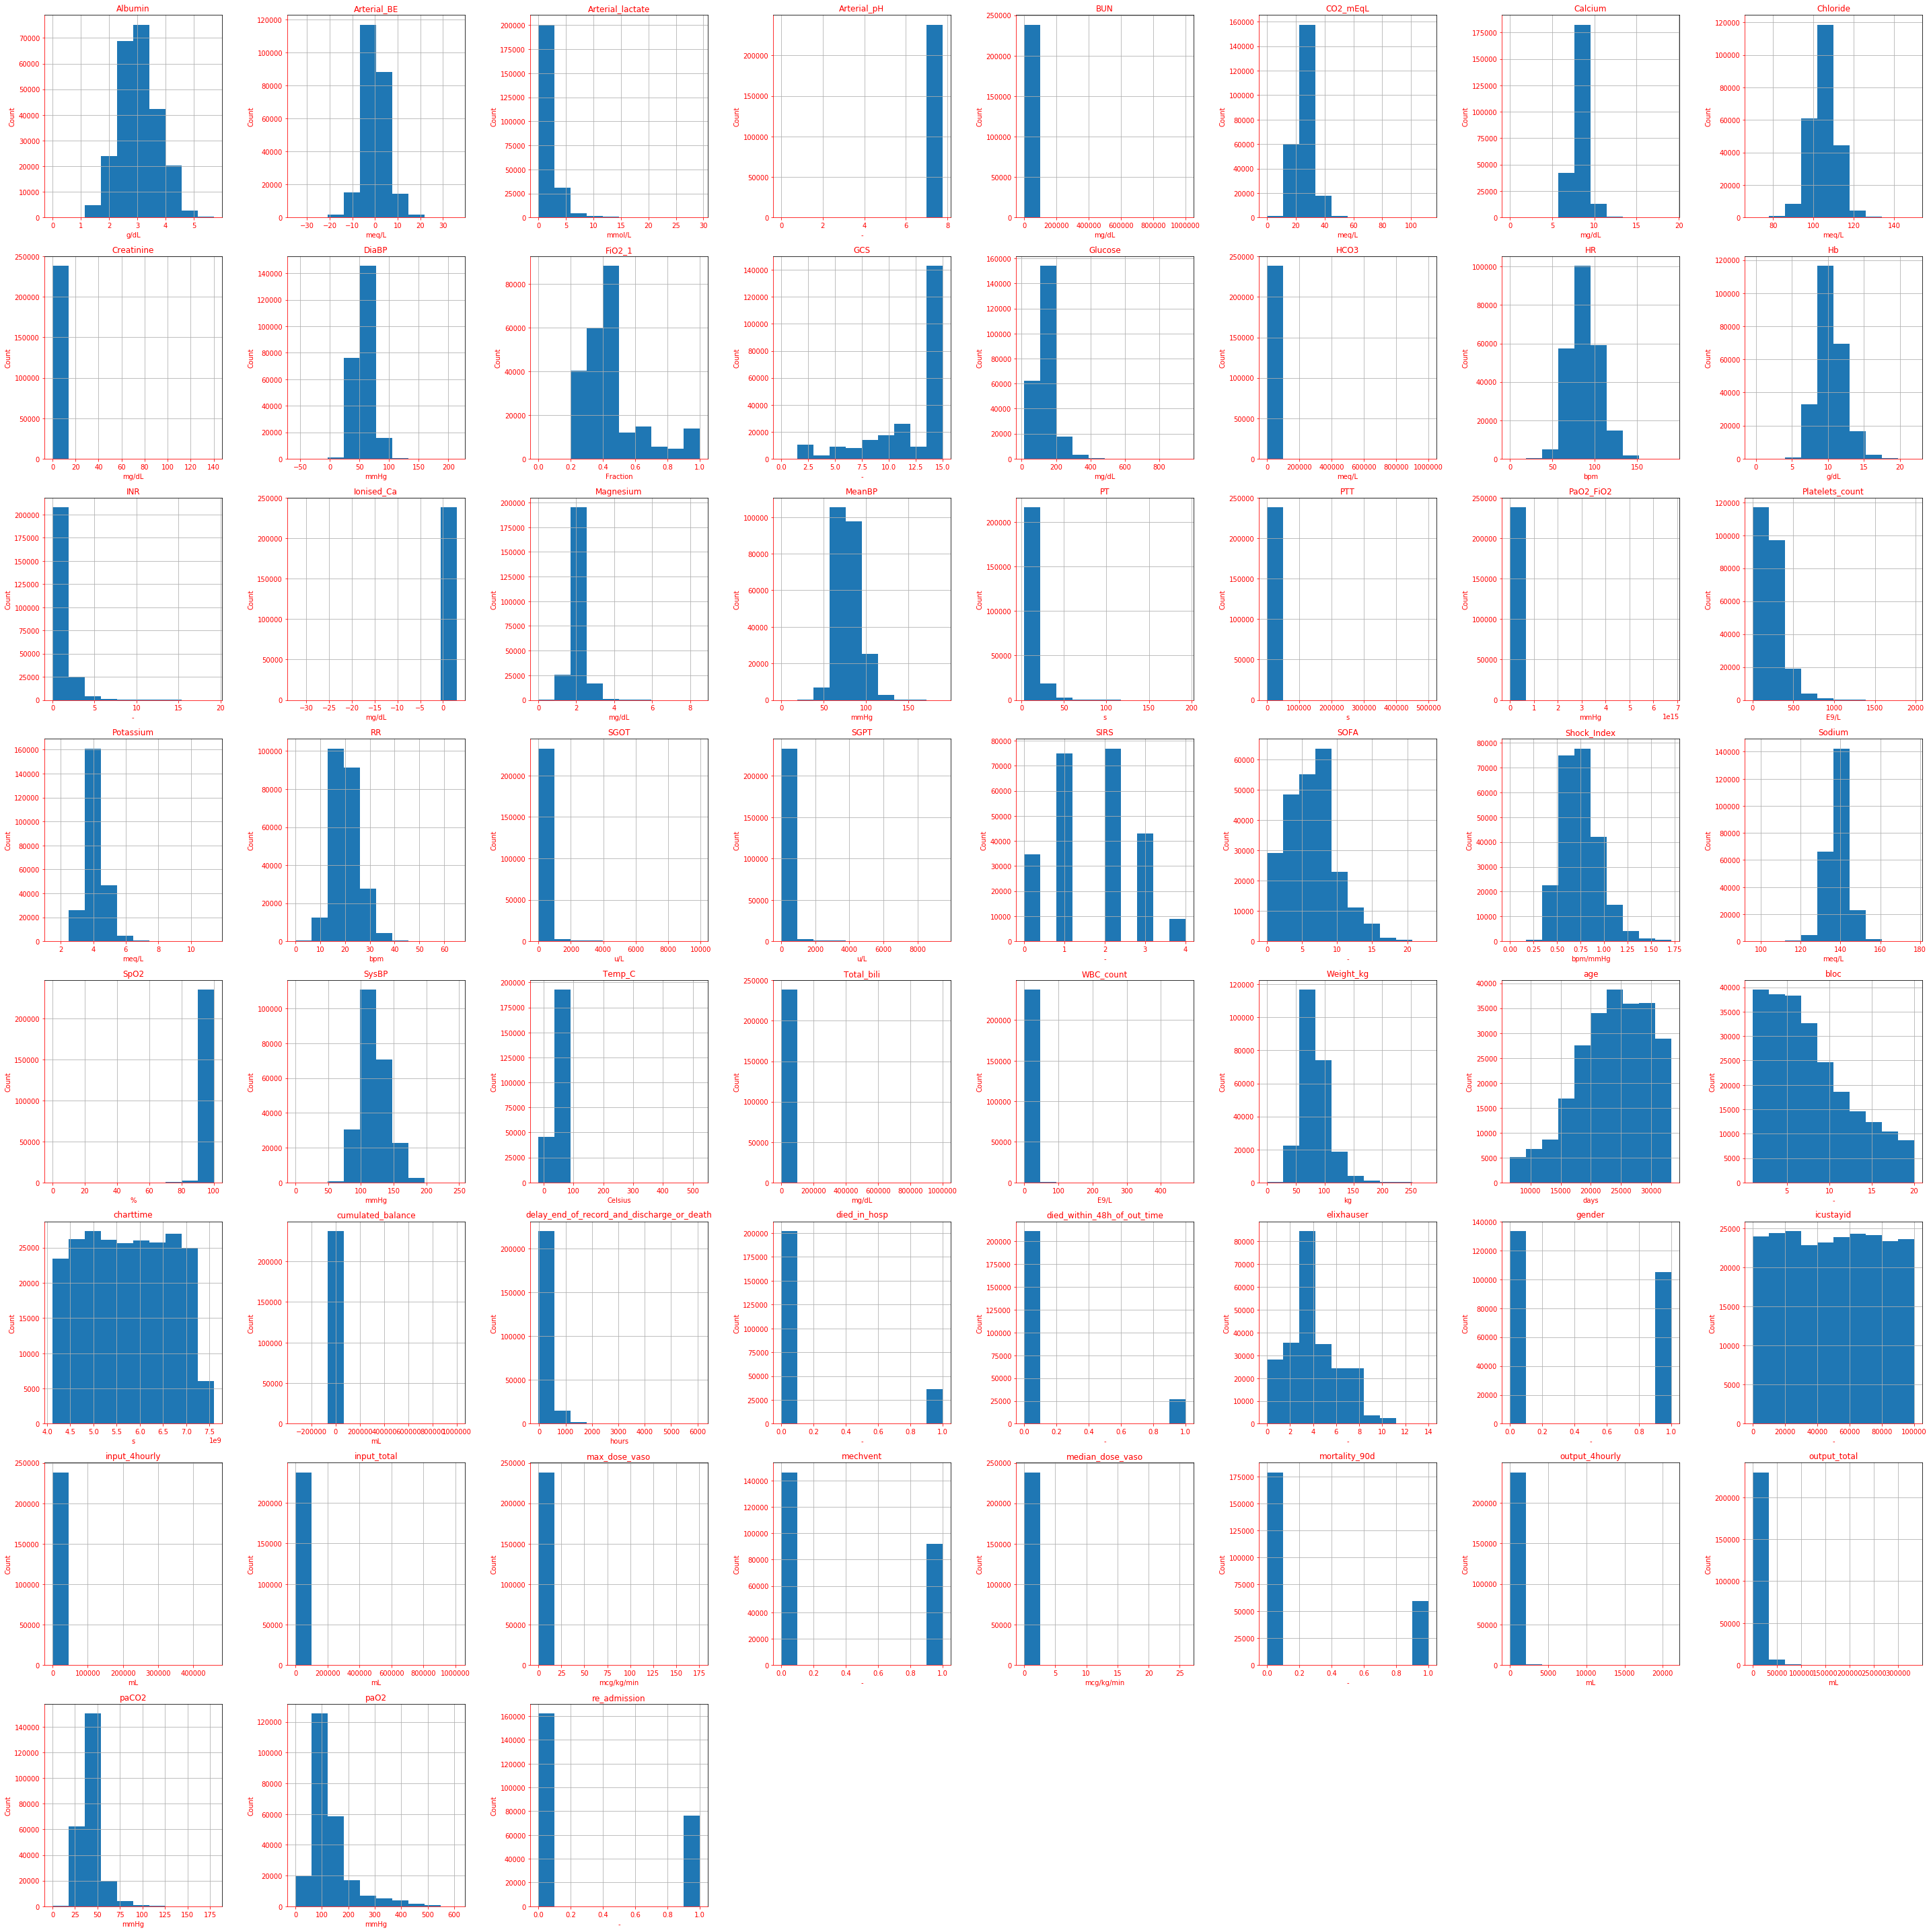

In [13]:
# Plot all the histograms
allhists = patientdata.hist(figsize=[40, 40])
# Grab all columns
i = 0
# The 62 is significant because one blank 'histogram' is generated for spacing
for hist in allhists.flatten():
    if(i < 59):
        #  Label based on the Excel readout
        hist.set_xlabel(labels[str(hist.title).split(",")[2][1:-1]])
        hist.set_ylabel("Count")
        hist.xaxis.label.set_color('red')
        hist.spines['left'].set_color('red')
        hist.spines['bottom'].set_color('red')
        hist.title.set_color('red')
        hist.yaxis.label.set_color('red')
        hist.tick_params(axis='x', colors='red')
        hist.tick_params(axis='y', colors='red')
        i = i + 1
# Insure proper spacing
plt.tight_layout()
# Show all histograms
plt.show()    

In [4]:
# Read in the file containing all the patient data
patientdatamod = pd.read_csv("G:/MIMIC-ALL/MIMIC-PATIENTS/patient_data_modified.csv")

In [5]:
# How Many Indiviudal patients are in this Dataset total? 21463

# Note this uses the 'PandaSQL' library to perform SQL on pandas dataframes
patient_count = pandasql.sqldf("SELECT COUNT(DISTINCT icustayid) FROM patientdatamod")
print(patient_count)

   COUNT(DISTINCT icustayid)
0                      21463


In [6]:
# How many patients were diagnosed with Sepsis under qSOFA standards? 14330
qSOFACount = pandasql.sqldf("SELECT COUNT(*) FROM(SELECT * FROM (SELECT AVG(qSOFAFlag) AS qSOFACount FROM patientdatamod GROUP BY icustayid) WHERE qSOFACount > 0)")
print(qSOFACount)

   COUNT(*)
0     14330


In [7]:
# How many patients were diagnosed with Sepsis under SOFA standards? 8819
SOFACount = pandasql.sqldf("SELECT COUNT(*) FROM(SELECT * FROM (SELECT AVG(SOFAFlag) AS SOFACount FROM patientdatamod GROUP BY icustayid) WHERE SOFACount > 0)")
print(SOFACount)

   COUNT(*)
0      8819
